In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

os.listdir('/content/drive/MyDrive')


['Classroom',
 'Colab Notebooks',
 'Plant_leaf_diseases_dataset_without_augmentation.zip',
 'Plant_leave_diseases_dataset_without_augmentation',
 'image (96).JPG',
 'Plant_leave_diseases_dataset_without_augmentation_extracted',
 'Extracted_Plant_leaf_diseases',
 '1730906716003.png',
 '1731145610350.png',
 'healthy_list.txt',
 'Data for Leaf Disease',
 'leaf_disease_resnet_v1.keras',
 'leaf_disease_resnet.keras',
 'Data_for_Leaf_Disease',
 'Leaf_Dataset_Split',
 'mobilenet_leaf_disease_final.keras',
 'predictions.csv',
 'hibiscus_mobilenet_model.h5',
 'hibiscus_mobilenet_model.keras',
 'densenet121_leaf_model.keras',
 'Final_Leaf_Dataset',
 'Plant_Only_Dataset',
 'disease_detector.keras',
 'resnet50_leaf_disease_final.keras',
 'Untitled document.gdoc',
 'Test_Leaves',
 'Final_Leaf_Dataset_Binary',
 'Data for Leaf Disease.zip',
 'LEAF DISEASE DETECTION.gdoc',
 'restaurant_dataset.csv',
 'Restaurant_Project',
 'Copy of restaurant_dataset.csv']

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/restaurant_dataset.csv')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape


(9551, 21)

In [5]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

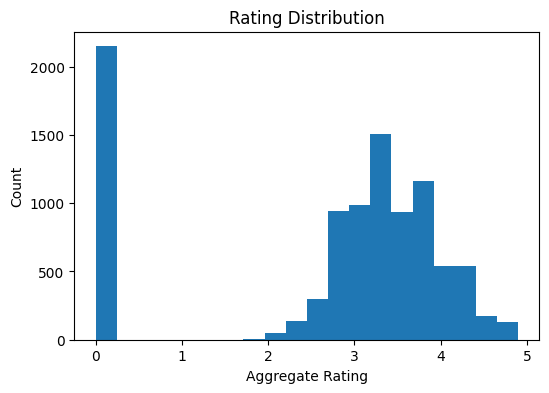

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['Aggregate rating'], bins=20)
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


In [9]:
# Remove restaurants with zero rating
df = df[df['Aggregate rating'] > 0]

# Check new shape
df.shape


(7403, 21)

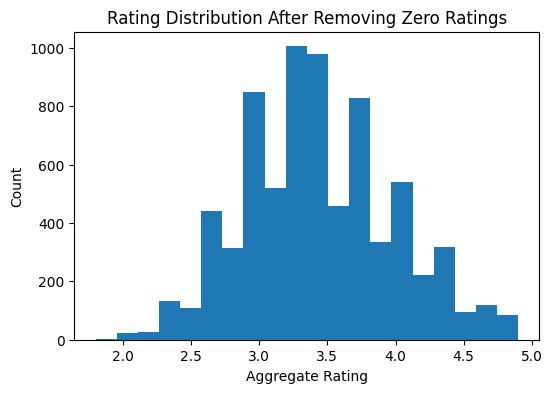

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['Aggregate rating'], bins=20)
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.title('Rating Distribution After Removing Zero Ratings')
plt.show()


In [11]:
# Drop columns not useful for prediction
drop_cols = [
    'Restaurant ID',
    'Restaurant Name',
    'Address',
    'Locality Verbose',
    'Rating color',
    'Rating text',
    'Currency'
]

df = df.drop(columns=drop_cols)

df.head()


,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,314
1,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Yes,No,No,No,3,4.5,591
2,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,270
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,No,4,4.9,365
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,229


In [12]:
df.isnull().sum()


,0
Country Code,0
City,0
Locality,0
Longitude,0
Latitude,0
Cuisines,9
Average Cost for two,0
Has Table booking,0
Has Online delivery,0
Is delivering now,0


In [13]:
# Fill missing cuisines with 'Unknown'
df['Cuisines'] = df['Cuisines'].fillna('Unknown')


In [14]:
binary_cols = [
    'Has Table booking',
    'Has Online delivery',
    'Is delivering now',
    'Switch to order menu'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['City', 'Locality', 'Cuisines']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7403 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          7403 non-null   int64  
 1   City                  7403 non-null   int64  
 2   Locality              7403 non-null   int64  
 3   Longitude             7403 non-null   float64
 4   Latitude              7403 non-null   float64
 5   Cuisines              7403 non-null   int64  
 6   Average Cost for two  7403 non-null   int64  
 7   Has Table booking     7403 non-null   int64  
 8   Has Online delivery   7403 non-null   int64  
 9   Is delivering now     7403 non-null   int64  
 10  Switch to order menu  7403 non-null   int64  
 11  Price range           7403 non-null   int64  
 12  Aggregate rating      7403 non-null   float64
 13  Votes                 7403 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 867.5 KB


In [17]:
# Features (X) and Target (y)
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((5922, 13), (1481, 13))

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
